In [1]:
import h5py

import pywt
import wavelets

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from kpnet.cluster import *
from kpnet.handler import *
from kpnet.network import *
from kpnet.signal import *
from kpnet.callback import *
from kpnet.entropy import *

In [2]:
N = 64
time_interval = 2 ** 16
chunk = 2 ** 13

In [3]:
np.random.seed(0)
#neuron = 5
# 20, 0.078
# Period - N, 3, alpha=0.044, beta=0.2, gamma=3.2
net = KPNetworkTanh(N, alpha=0.05, beta=0.3, gamma=2.2)

callbacks = {}
callbacks['W'] = WeightsCallback(time_interval, N, chunk, 'data/data.hfd5')
signal = SwitchSignal([2000, time_interval], [RandomUnitSignal(N), ZeroSignal(N)])
handler = ComputationHandler(time_interval)
results = handler.run(net, signal, callbacks)

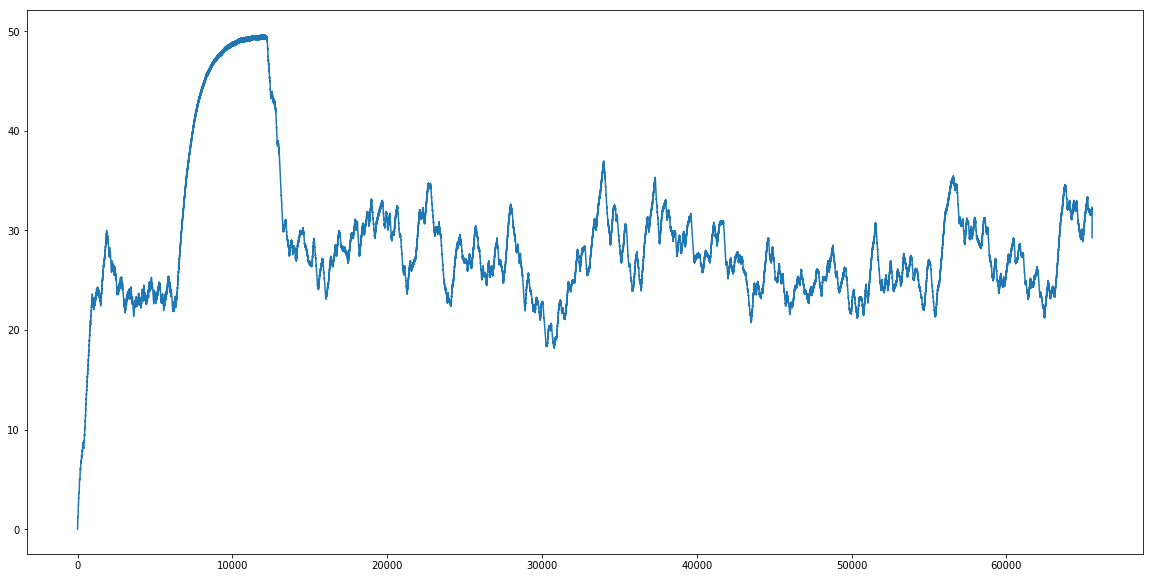

In [4]:
W = h5py.File('data/data.hfd5', 'r')['W']

plt.figure(figsize=(20, 10))
plt.plot(W[25, 23])
plt.show()

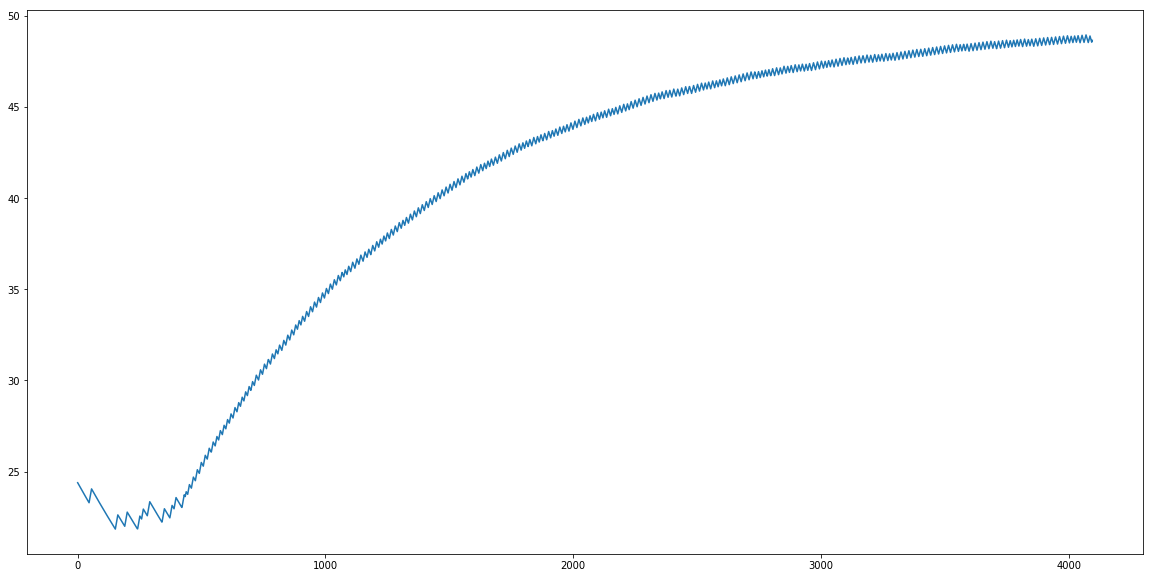

In [5]:
begin = 6000
end   = 10096
pattern = W[25, 23, begin : end]

plt.figure(figsize=(20, 10))
plt.plot(pattern)
plt.show()

In [6]:
wtc = WTClustering(W, pattern, CWTDistribution, wavelets.Ricker())
%time clusters = wtc.run(begin, end, epsilon=0.003, delta=0.005)

CPU times: user 7min 16s, sys: 1.45 s, total: 7min 17s
Wall time: 7min 18s


In [7]:
clusters

[[3, 5, 11, 13, 29, 31, 34, 36, 42, 0], [12, 58, 8], [25, 23]]

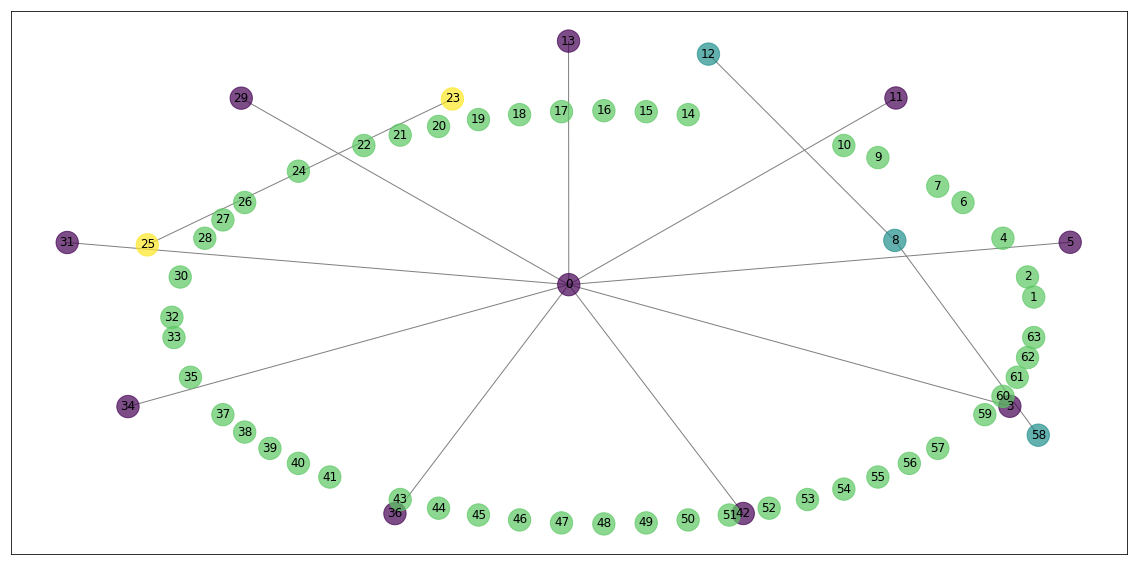

In [8]:
wtc.plot((20, 10))